<a href="https://colab.research.google.com/github/dibiersanchez/Fase-I-Cocreacion-Dibier-Sanchez/blob/main/TP1/Fase1_Cocreacion_Dibier_sanchez_2024_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto explorando la biodiversidad   en Cundinamarca y Boyacá. Fase I, Adquisición de Datos y Preprocesamiento y Análisis de Datos. Dibier Sanchez

In [ ]:
!pip install sodapy

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

od.download("https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dibiersanchez
Your Kaggle Key: ··········


100%|██████████| 84.7M/84.7M [00:00<00:00, 118MB/s]


In [ ]:
csvFile = pd.read_csv('./climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
print(csvFile)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Å

In [ ]:
df_clima = pd.DataFrame.from_records(csvFile)
print(df_clima)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Å

In [ ]:
# Filtrar las filas correspondientes a Colombia
df_colombia = df_clima[df_clima['Country'] == 'Colombia']

# Mostrar el DataFrame con información solo de Colombia
print(df_colombia)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
409839   1825-01-01              22.596                          1.992   
409840   1825-02-01              22.124                          1.662   
409841   1825-03-01              22.196                          1.920   
409842   1825-04-01              22.554                          1.941   
409843   1825-05-01              21.399                          1.226   
...             ...                 ...                            ...   
8042137  2013-05-01              24.870                          0.351   
8042138  2013-06-01              24.805                          0.379   
8042139  2013-07-01              24.292                          0.363   
8042140  2013-08-01              24.578                          0.375   
8042141  2013-09-01                 NaN                            NaN   

                  City   Country Latitude Longitude  
409839         Armenia  Colombia    4.02N    76.34W  
409

In [ ]:
df_region = df_colombia[df_colombia['City'].isin(['Tunja', 'Tabasco', 'Belén', 'Fusagasugá', 'Girardot', 'Bogotá'])]
df=pd.DataFrame.from_records(df_region)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1824-01-01,20.116,1.370,Bogotá,Colombia,4.02N,74.73W
1,1824-02-01,19.797,2.109,Bogotá,Colombia,4.02N,74.73W
2,1824-03-01,20.044,1.548,Bogotá,Colombia,4.02N,74.73W
3,1824-04-01,19.766,1.786,Bogotá,Colombia,4.02N,74.73W
4,1824-05-01,19.555,1.371,Bogotá,Colombia,4.02N,74.73W


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             6831 non-null   object 
 1   AverageTemperature             6113 non-null   float64
 2   AverageTemperatureUncertainty  6113 non-null   float64
 3   City                           6831 non-null   object 
 4   Country                        6831 non-null   object 
 5   Latitude                       6831 non-null   object 
 6   Longitude                      6831 non-null   object 
dtypes: float64(2), object(5)
memory usage: 373.7+ KB


In [ ]:
print('El valor de la media es:', round(np.mean(df_region['AverageTemperatureUncertainty'].dropna()), 2))
print('El valor de la mediana es:', round(np.median(df_region['AverageTemperatureUncertainty'].dropna()), 2))
print('El valor de la desviación estándar es:', round(np.std(df_region['AverageTemperatureUncertainty'].dropna()), 2))
print('El valor del máximo es:', round(np.max(df_region['AverageTemperatureUncertainty'].dropna()), 2))
print('El valor del mínimo es:', round(np.min(df_region['AverageTemperatureUncertainty'].dropna()), 2))
print('El valor del rango es:', round(np.max(df_region['AverageTemperatureUncertainty'].dropna()) - np.min(df_region['AverageTemperatureUncertainty'].dropna()), 2))

El valor de la media es: 0.71
El valor de la mediana es: 0.53
El valor de la desviación estándar es: 0.47
El valor del máximo es: 3.57
El valor del mínimo es: 0.08
El valor del rango es: 3.49


In [ ]:
print('El valor de la media es:', round(np.mean(df_region['AverageTemperature'].dropna()), 2))
print('El valor de la mediana es:', round(np.median(df_region['AverageTemperature'].dropna()), 2))
print('El valor de la desviación estándar es:', round(np.std(df_region['AverageTemperature'].dropna()), 2))
print('El valor del máximo es:', round(np.max(df_region['AverageTemperature'].dropna()), 2))
print('El valor del mínimo es:', round(np.min(df_region['AverageTemperature'].dropna()), 2))
print('El valor del rango es:', round(np.max(df_region['AverageTemperature'].dropna()) - np.min(df_region['AverageTemperature'].dropna()), 2))


El valor de la media es: 19.79
El valor de la mediana es: 19.78
El valor de la desviación estándar es: 0.78
El valor del máximo es: 22.51
El valor del mínimo es: 17.45
El valor del rango es: 5.05


In [ ]:
modelo_a = df['AverageTemperature'].mean()
print('La media de la temperatura es:', modelo_a)

La media de la temperatura es: 19.79019728447571


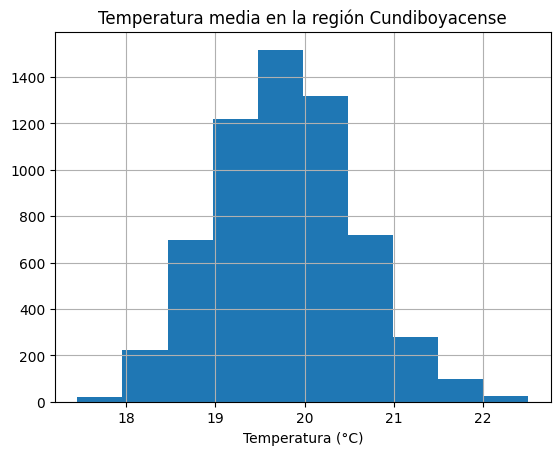

In [ ]:
columna_temp = df['AverageTemperature']

columna_temp.hist(bins=10)
plt.title('Temperatura media en la región Cundiboyacense')
plt.xlabel('Temperatura (°C)')
plt.show()

**Análsis de la gráfica**


*   Se evidencia el promedio de temperatura de 19.8 °C en la región Cundiboyacense.

*   Se presentan menor presencia en temperaturas que estan al rededor de los 18 °C y 22 °C.






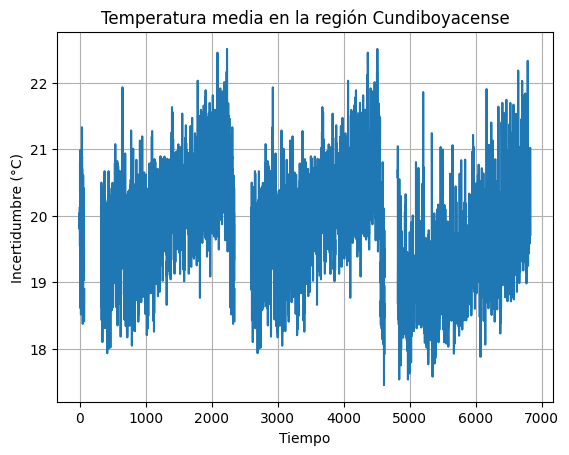

In [ ]:
columna_inc = df['AverageTemperature']

columna_inc.plot()
plt.title('Temperatura media en la región Cundiboyacense')
plt.xlabel('Tiempo')
plt.ylabel('Incertidumbre (°C)')
plt.grid()
plt.show()


**Análsis de la gráfica**


*   Gracias al grafico se puede observar que el promedio de temperatura en la región Cundiboyacense incremeto de manera significativa despues de los años 2000, en donde esta por arriba de los 22 °C y no baja de los 19 °C.






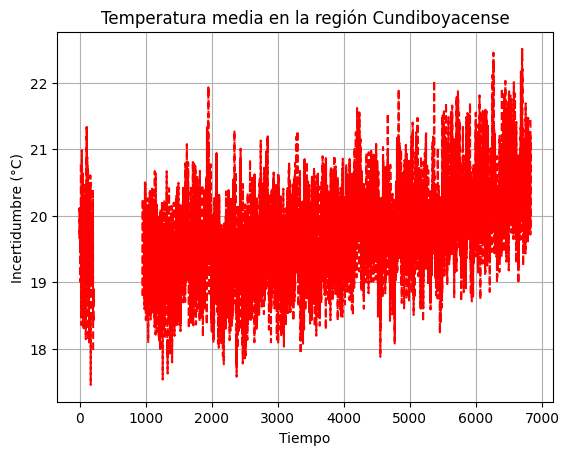

In [ ]:
#Ordenar las fechas y valores del data Frame

data_o=df.sort_values(by=['dt'])
valores=list(data_o['AverageTemperature'])
plt.plot(valores,'r--')
plt.title('Temperatura media en la región Cundiboyacense')
plt.xlabel('Tiempo')
plt.ylabel('Incertidumbre (°C)')
plt.grid()
plt.show()

In [ ]:
print(data_o.head(1))

           dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0  1824-01-01              20.116                           1.37  Bogotá   

    Country Latitude Longitude  
0  Colombia    4.02N    74.73W  


In [ ]:
print(data_o.tail())

              dt  AverageTemperature  AverageTemperatureUncertainty      City  \
2275  2013-08-01              21.451                          0.242    Bogotá   
4552  2013-08-01              21.451                          0.242  Girardot   
4553  2013-09-01                 NaN                            NaN  Girardot   
2276  2013-09-01                 NaN                            NaN    Bogotá   
6830  2013-09-01                 NaN                            NaN     Tunja   

       Country Latitude Longitude  
2275  Colombia    4.02N    74.73W  
4552  Colombia    4.02N    74.73W  
4553  Colombia    4.02N    74.73W  
2276  Colombia    4.02N    74.73W  
6830  Colombia    5.63N    72.65W  


<Figure size 1000x800 with 0 Axes>

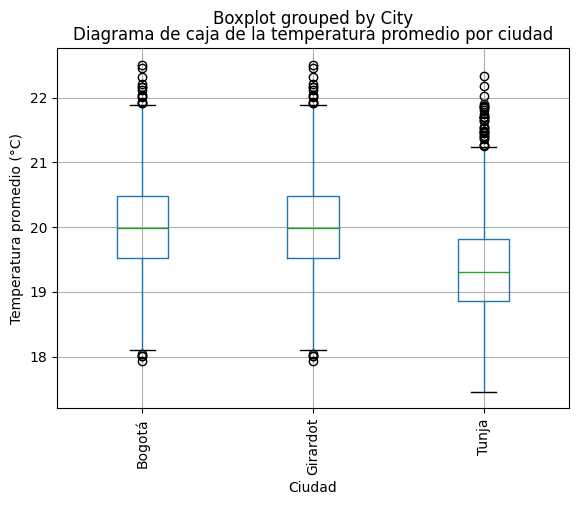

In [ ]:
plt.figure(figsize=(10, 8))
df.boxplot(column='AverageTemperature', by='City', rot=90)
plt.title('Diagrama de caja de la temperatura promedio por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura promedio (°C)')
plt.show()

**Análsis de la gráfica**

Este diagrama muestran tres ciudades dentro de la región Cundiboyacense, en donde se analiza la temperatura promedio que se tiene en cada.

Según la grafica, se observa que representa el valor medio de a temperatura promedio de cada ciudad.

Ademas se puede observar que una ciudad tiene una caja muy corta y bigotes largos, esto significa que hay una gran variabilidad en las temperaturas registradas para esa ciudad.

In [ ]:
# Calcular la temperatura promedio por ciudad
temperatura_promedio_por_ciudad = df.groupby('City')['AverageTemperature'].mean()
print("Temperatura promedio por ciudad:")
print(temperatura_promedio_por_ciudad)

Temperatura promedio por ciudad:
City
Bogotá      20.002265
Girardot    20.002265
Tunja       19.378111
Name: AverageTemperature, dtype: float64


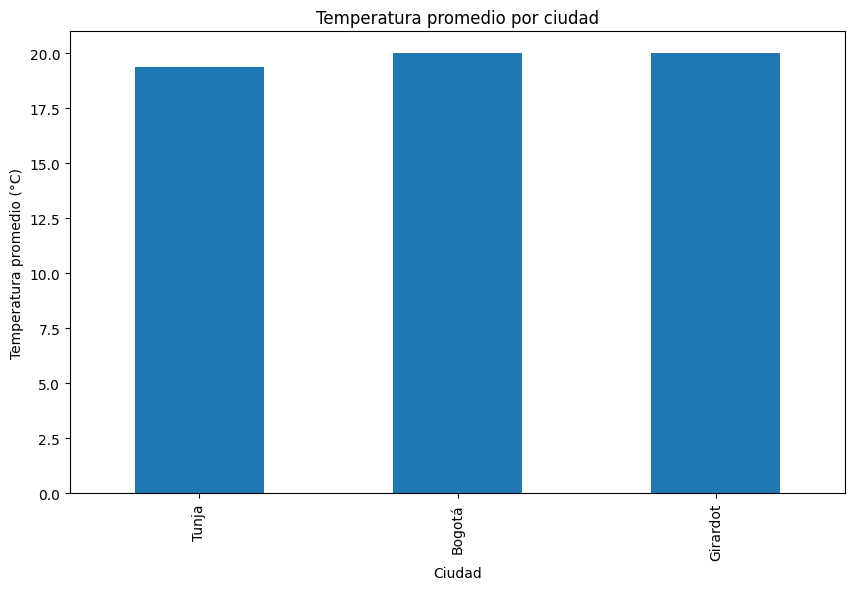

In [ ]:
temperatura_promedio_por_ciudad = df.groupby('City')['AverageTemperature'].mean().sort_values()

plt.figure(figsize=(10, 6))
temperatura_promedio_por_ciudad.plot(kind='bar')
plt.title('Temperatura promedio por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura promedio (°C)')
plt.xticks(rotation=90)
plt.show()



**Análsis de la gráfica**



*   Se evidencia el promedio de temepratura media de cada ciudad seleccionada que se encuentra en la region Cundiboyacense.
*   Girardot es la ciudad que mas presenta temperatura a comparación de las otras ciudades.
* La ciudad con menor registro es Tunja.






In [ ]:
df_region.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1020512,1824-01-01,20.116,1.370,Bogotá,Colombia,4.02N,74.73W
1020513,1824-02-01,19.797,2.109,Bogotá,Colombia,4.02N,74.73W
1020514,1824-03-01,20.044,1.548,Bogotá,Colombia,4.02N,74.73W
1020515,1824-04-01,19.766,1.786,Bogotá,Colombia,4.02N,74.73W
1020516,1824-05-01,19.555,1.371,Bogotá,Colombia,4.02N,74.73W


In [ ]:
df_region.pivot_table(values='AverageTemperature', index='City', columns=['Country'], aggfunc='count')


Country,Colombia
City,
Bogotá,2018
Girardot,2018
Tunja,2077


In [ ]:
df_region.groupby(df_region['AverageTemperature']).count()[['City']]

,City
AverageTemperature,
17.454,1
17.535,1
17.536,1
17.578,1
17.626,1
...,...
22.207,2
22.318,2
22.329,1
